# lady testing tea

Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over multiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.



Problem Statement
Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups.
Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

In [73]:
import math 


In [74]:
no_cups = 8 
no_cups_milk_first = 4 
no_cups_tea_first = 4 


In [75]:
ways = math.comb(no_cups, no_cups_milk_first)
ways 


70

In [76]:
ways_ordered = 8 * 7 * 6 * 5 

ways_ordered

1680

In [77]:
no_shuffles = 4 * 3 * 2 * 1 
no_shuffles

24

In [78]:
no_combs = ways_ordered // no_shuffles
no_combs

70

-------------------------------------

In [79]:
import numpy as np 
from scipy.stats import fisher_exact 

In [80]:
cups_total = 8 
cups_milk_first = 4 
cups_tea_first = 4 

In [81]:
np.random.seed(42)
actual_cups = np.array([1]*cups_milk_first + [0]*cups_tea_first)
np.random.shuffle(actual_cups) 


In [82]:
lady_guesses = np.array([1]*cups_milk_first + [0]*cups_tea_first)

# Now we will count her correct guesses:
# Number of true positives (correct milk first identification) and false positives
true_positives = np.sum((actual_cups == 1) & (lady_guesses == 1))
false_positives = np.sum((actual_cups == 0) & (lady_guesses == 1))

# Create the contingency table
# Table of the format [[True Positives, False Positives], [False Negatives, True Negatives]]
contingency_table = np.array([[true_positives, false_positives], 
                              [cups_milk_first - true_positives, cups_tea_first - false_positives]])


In [83]:
oddsratio, p_value = fisher_exact(contingency_table, alternative='greater')

contingency_table, p_value

(array([[2, 2],
        [2, 2]]),
 0.7571428571428571)

----------------------------------------------------------------------------

In [84]:
import numpy as np
# A numpy random number generator
rng = np.random.default_rng()

import pandas as pd
# Safe setting for Pandas.  Needs Pandas version >= 1.5.
pd.set_option('mode.copy_on_write', True)

# Load the library for plotting, name it 'plt'
import matplotlib.pyplot as plt
# Make plots look a little more fancy
plt.style.use('fivethirtyeight')

In [85]:
# Just run the code in this cell.
# Make an empty DataFrame to store the eight cups.
tea_df = pd.DataFrame()
# insert a column that records whether Fisher had in fact poured the milk
# before the tea, into that cup:
tea_df['milk_first'] = np.repeat(['yes', 'no'], [4, 4])
# Add a column recording which cups Muriel chose as her guesses for the
# cups where Fisher had poured the milk first:
tea_df['says_milk_first'] = np.repeat(['yes', 'no'], [4, 4])
# Take a sample (without replacement) of 8 rows.
# This has the effect of putting rows in random order.
tea_df = tea_df.sample(8, replace=False)
# Reset the row labels to throw away the labels showing the original order.
tea_df = tea_df.reset_index(drop=True)

In [86]:
# Show our reconstruction of Fisher's table
tea_df

,milk_first,says_milk_first
0,yes,yes
1,no,no
2,yes,yes
3,no,no
4,no,no
5,yes,yes
6,yes,yes
7,no,no


In [87]:
milk_first = tea_df['milk_first']
says_milk_first = tea_df['says_milk_first']
says_milk_first

0    yes
1     no
2    yes
3     no
4     no
5    yes
6    yes
7     no
Name: says_milk_first, dtype: object

In [88]:
counts_tab = pd.crosstab(milk_first, says_milk_first)
counts_tab

says_milk_first,no,yes
milk_first,,
no,4,0
yes,0,4


In [89]:
milk_first_correct = counts_tab.loc['yes', 'yes']
milk_first_correct

4

In [90]:
# Make the random association.
fake_says = rng.permutation(says_milk_first)
fake_says

array(['yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no'], dtype=object)

In [91]:
fake_counts_tab = pd.crosstab(milk_first, fake_says)
fake_counts_tab

col_0,no,yes
milk_first,,
no,3,1
yes,1,3


In [92]:
fake_mf_correct = fake_counts_tab.loc['yes', 'yes']
fake_mf_correct

3

In [93]:
# Notice we're only using 1000 iterations, not our usual 10_000
# This is to save some time; the crosstab is a little slow.
n_iters = 1000
fake_mf_corrects = np.zeros(n_iters)
for i in np.arange(n_iters):
    fake_says = rng.permutation(says_milk_first)
    fake_counts_tab = pd.crosstab(milk_first, fake_says)
    fake_mf_correct = fake_counts_tab.loc['yes', 'yes']
    fake_mf_corrects[i] = fake_mf_correct
fake_mf_corrects[:10]

array([2., 2., 1., 1., 3., 1., 2., 1., 1., 3.])

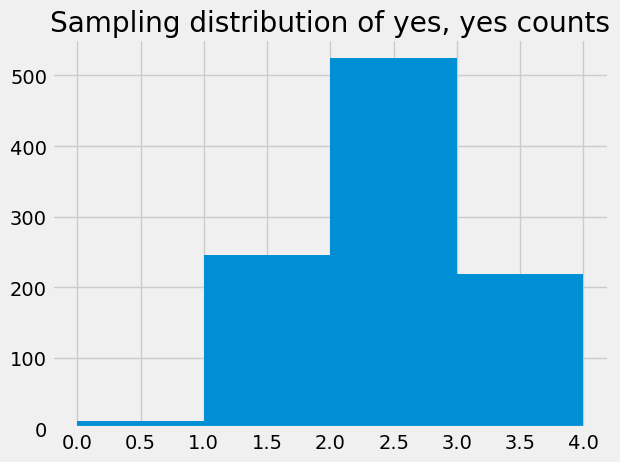

In [94]:
plt.hist(fake_mf_corrects, bins=np.arange(5));
plt.title('Sampling distribution of yes, yes counts');

In [95]:
np.count_nonzero(fake_mf_corrects == 4) / n_iters

0.016

In [96]:
# Probability that Muriel will select all 4 milk-first cups
# correctly if she is just guessing.
4 / 8 * 3 / 7 * 2 / 6 * 1 / 5

0.014285714285714285

In [97]:
# Get stats module from Scipy.
import scipy.stats as sps

In [98]:
# Calculate Fisher's Exact Test p-value
odds_ratio, p_value = sps.fisher_exact(counts_tab,
                                       alternative='greater')
p_value

0.014285714285714284

------------------------------------------------------------------------------

In [99]:
total_no_cups = 12
no_of_cups_selected = 6

# Define a function to return the factorial of an int
def fact(num):
    factorial = 1
    for i in range(1, num + 1):
        factorial *= i
    return factorial

perms_total = fact(total_no_cups)
print(f'The total number of permutations for {total_no_cups} cups is {perms_total}.')

    

The total number of permutations for 12 cups is 479001600.


In [100]:
combs_total = fact(no_of_cups_selected)
print(f'The total number of combinations for {no_of_cups_selected} cups is {combs_total}.')



The total number of combinations for 6 cups is 720.


In [101]:
# Calculate the binomial coefficient for choosing 6 out of 12 (12C6)
# Manual calculation for combinations: 12*11*10*9*8*7 / 6!
ans = perms_total // (combs_total * fact(total_no_cups - no_of_cups_selected))
print(f'The chance of selecting the six milk-first cups out of the twelve is a 1 in {ans} chance.')


The chance of selecting the six milk-first cups out of the twelve is a 1 in 924 chance.


In [102]:
ans_2 = math.comb(total_no_cups, no_of_cups_selected)

if ans == ans_2:
    print('Your manually calculated solution is correct.')
else:
    print('Your manually calculated solution is incorrect.')


Your manually calculated solution is correct.


In [103]:
probability_under_null_hypothesis = 1 / ans
print(f'\nThe probability of the lady guessing the correct cups by chance is {probability_under_null_hypothesis:.5f}.')




The probability of the lady guessing the correct cups by chance is 0.00108.


In [104]:
observed_successes = 4  # let's assume the lady correctly identified 4 out of 6 cups
max_errors_allowed = 2  # allowing up to 2 errors


In [105]:
if observed_successes >= (no_of_cups_selected - max_errors_allowed):
    print(f'\nThe lady made {no_of_cups_selected - observed_successes} errors, but this is within the acceptable range.')
    print('The result suggests she might have some ability to distinguish the cups.')
else:
    print(f'\nThe lady made {no_of_cups_selected - observed_successes} errors, which is beyond the acceptable range.')
    print('This result suggests she might be guessing.')


The lady made 2 errors, but this is within the acceptable range.
The result suggests she might have some ability to distinguish the cups.


In [106]:

# Given data for Fisher's Lady Tasting Tea Test
total_no_cups = 12
no_of_cups_selected = 6
max_errors_allowed = 2

# Observed successes (e.g., 6 correct down to 2 correct)
observed_successes = [6, 5, 4, 3, 2, 1, 0]

# Create a data frame to hold the results
results = []

# Populate the results based on observed successes
for success in observed_successes:
    errors_made = no_of_cups_selected - success
    # Reject the Null Hypothesis if the number of errors is less than or equal to the allowed errors
    reject_null = "Yes" if success >= (no_of_cups_selected - max_errors_allowed) else "No"
    
    # Type I Error happens if we reject the Null Hypothesis but the lady is actually guessing
    # Type II Error happens if we fail to reject the Null Hypothesis but the lady can distinguish
    # For simplicity, we assume Type I occurs when Null is true but rejected, and Type II occurs when it should have been rejected but wasn't.
    
    type_I_error = "Yes" if reject_null == "Yes" and success <= 2 else "No"
    type_I_error_note = "False Positive" if type_I_error == "Yes" else ""
    
    type_I_error_probability = 1 / math.comb(total_no_cups, no_of_cups_selected) if type_I_error == "Yes" else 0

    type_II_error = "Yes" if reject_null == "No" and success >= 4 else "No"
    type_II_error_note = "False Negative" if type_II_error == "Yes" else ""
    
    type_II_error_probability = (1 - (1 / math.comb(total_no_cups, no_of_cups_selected))) if type_II_error == "Yes" else 0
    
    results.append({
        'Observed Successes': success,
        'Errors Made': errors_made,
        'Null Hypothesis Rejected': reject_null,
        'Type I Error': type_I_error,
        'Type I Error Probability': type_I_error_probability,
        'Type I Error Note': type_I_error_note,
        'Type II Error': type_II_error,
        'Type II Error Probability': type_II_error_probability,
        'Type II Error Note': type_II_error_note
    })

# Create a pandas DataFrame
df = pd.DataFrame(results)

# Print the DataFrame
print(df)






   Observed Successes  Errors Made Null Hypothesis Rejected Type I Error  \
0                   6            0                      Yes           No   
1                   5            1                      Yes           No   
2                   4            2                      Yes           No   
3                   3            3                       No           No   
4                   2            4                       No           No   
5                   1            5                       No           No   
6                   0            6                       No           No   

   Type I Error Probability Type I Error Note Type II Error  \
0                         0                              No   
1                         0                              No   
2                         0                              No   
3                         0                              No   
4                         0                              No   
5            

1. If the lady correctly identifies 4, 5, or 6 cups, the test will suggest she has some ability to distinguish between the cups, even though she made up to two errors.
2. If she identifies fewer than 4 correctly, the test suggests her performance is indistinguishable from random guessing.

plotting the breakdown of guesses 

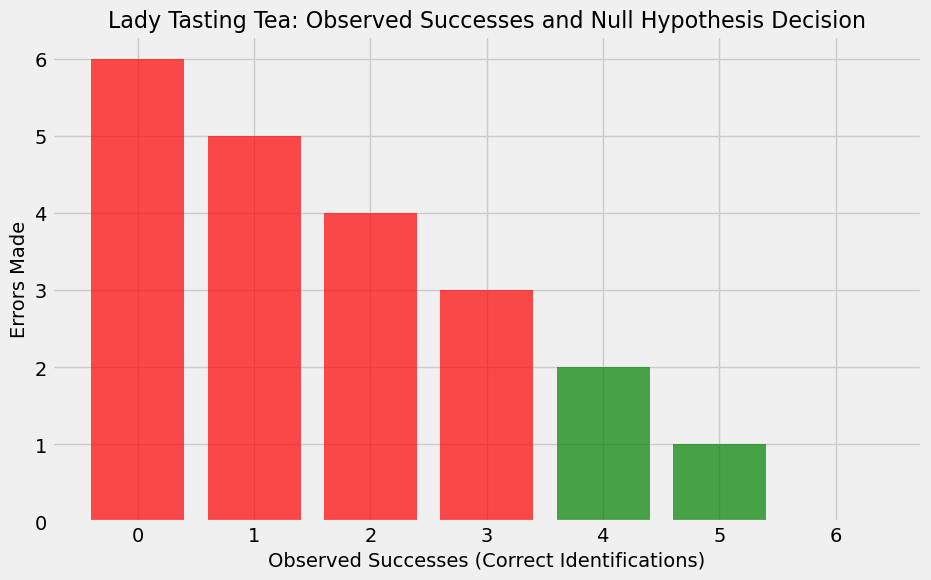

In [107]:
plt.figure(figsize=(10, 6))

# Bar plot for Observed Successes and Errors Made
colors = ['green' if x == 'Yes' else 'red' for x in df['Null Hypothesis Rejected']]
plt.bar(df['Observed Successes'], df['Errors Made'], color=colors, alpha=0.7)

# Add labels and title
plt.xlabel('Observed Successes (Correct Identifications)', fontsize=14)
plt.ylabel('Errors Made', fontsize=14)
plt.title('Lady Tasting Tea: Observed Successes and Null Hypothesis Decision', fontsize=16)

# Add legend for Type I and Type II Errors
for i, row in df.iterrows():
    if row['Type I Error'] == "Yes":
        plt.text(row['Observed Successes'], row['Errors Made'] + 0.2, 'Type I', color='blue', ha='center')
    if row['Type II Error'] == "Yes":
        plt.text(row['Observed Successes'], row['Errors Made'] + 0.2, 'Type II', color='orange', ha='center')

plt.show()

# Why Allow Two Errors:
1. Human Imperfection: It gives some allowance for occasional mistakes, as even someone with the ability to tell the difference may not perform perfectly every time.
2. Confidence Level: By allowing up to two errors, you're likely increasing the confidence level of the test, striking a balance between rejecting the Null Hypothesis too easily (Type I error) and failing to detect real skill (Type II error).